In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
pd.set_option('display.max_rows', None)
sns.set_style("dark")

### This analysis is about bike sharing data for "Capital Bikeshare" company for 2011-2012.


### About Capital Bikeshare
Capital Bikeshare is metro DC's bikeshare system, with more than 5,000 bikes available at 600 stations across seven jurisdictions: Washington, DC; Arlington, VA; Alexandria, VA; Montgomery County, MD; Prince George's County, MD; Fairfax County, VA; and the City of Falls Church, VA. Capital Bikeshare provides residents and visitors with a convenient, fun and affordable transportation option for getting from Point A to Point B.
https://ride.capitalbikeshare.com/

The data using in this analysis come from kaggle site.
https://www.kaggle.com/competitions/bike-sharing-demand/data

### Roadmap 
The first we explore the data(train data) to understand all data and its features and extract some intuition and maybe some knowledge then use them to prediction.

## Reading data

In [2]:
trdf = pd.read_csv('train.csv')
tedf = pd.read_csv('test.csv')
trdf.rename(columns={'count':'total number'},inplace=True);

In [3]:
trdf['datetime'] = pd.to_datetime(trdf['datetime']) 
tedf['datetime'] = pd.to_datetime(tedf['datetime'])
trdf.info()
print('-----------------------------------------------------------')
tedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  int64         
 2   holiday       10886 non-null  int64         
 3   workingday    10886 non-null  int64         
 4   weather       10886 non-null  int64         
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  total number  10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entr

In [4]:
trdf.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total number
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Nmuber of every season data

In [5]:
seasondf = trdf[['season','casual','registered','total number']].groupby(['season'],as_index=False).sum()
seasondf['season']=['spring','summer','fall','winter']
seasondf

,season,casual,registered,total number
0,spring,41605,270893,312498
1,summer,129672,458610,588282
2,fall,142718,497944,640662
3,winter,78140,465894,544034


In [6]:
# barchar function for seasondf
def BarChart(data,y:str,x:str,title:str,colorCond:int=600000):
    #ax = sns.barplot(data=seasondf,x=seasondf.index,y='count',palette=['red','gray','green','gray'])
    ax = sns.barplot(data=data,x=x,y=y)
    #print values for each bars.
    for i in ax.containers:
        ax.bar_label(i,)
    #remove additional components from the figure.
    sns.despine(top = True, left = True)
    ax.set(yticklabels=[])
    ax.tick_params(left=False)
    # All bars become gray except one.
    for bar in ax.patches:
        if bar.get_height() > colorCond:
            bar.set_color('red')    
        else:
            bar.set_color('grey')

    ax.set(title=title);
    

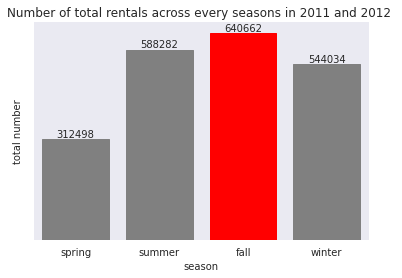

In [7]:
title='Number of total rentals across every seasons in 2011 and 2012 '
BarChart(seasondf,y='total number',x='season',title=title,colorCond=600000)

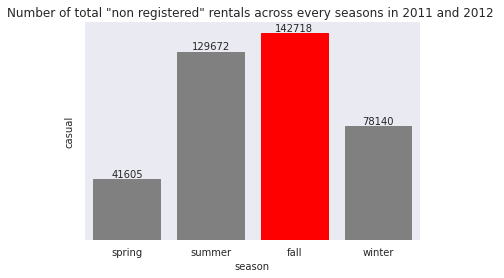

In [8]:
title='Number of total "non registered" rentals across every seasons in 2011 and 2012 '
BarChart(seasondf,y='casual',x='season',title=title,colorCond=130000)

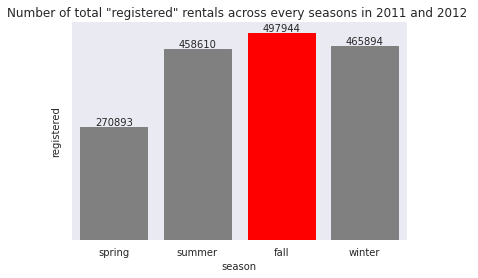

In [9]:
title='Number of total "registered" rentals across every seasons in 2011 and 2012 '
BarChart(seasondf,y='registered',x='season',title=title,colorCond=470000)

### Number of rentals in every seasons for casual or registered.

We show that in winter season rental number is maximum and spring season we had minimum number.

In [10]:
# function for ploting bars in different groups.
def barplotGroups(data,x,y,hue,title,legendtitle=''):
    ax=sns.barplot(data=data,x=x,y=y,hue=hue)
    #print values for each bars.
    for i in ax.containers:
        ax.bar_label(i,)

    #remove additional components from the figure.
    sns.despine(top = True, left = True)
    ax.set(yticklabels=[])
    ax.tick_params(left=False)
    ax.legend(title=legendtitle,loc='upper left')
    ax.set(title=title)
    return ax

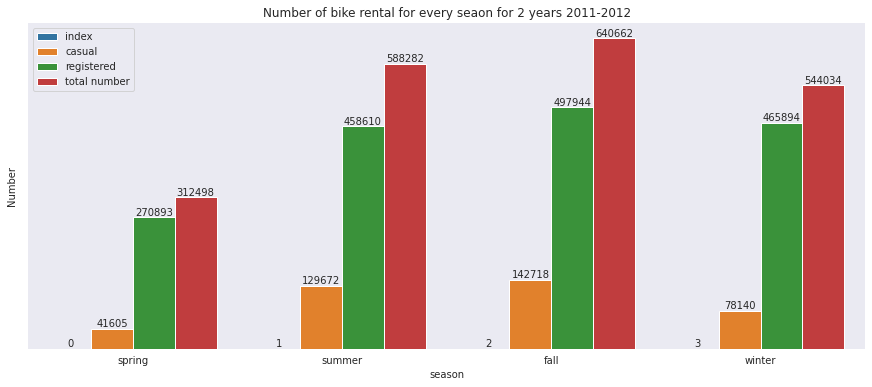

In [11]:
df=seasondf.reset_index().melt(id_vars='season',var_name='count')
df.rename(columns={'value':'Number'},inplace=True)
title = 'Number of bike rental for every seaon for 2 years 2011-2012'
plt.figure(figsize=(15,6))
barplotGroups(data=df,x='season',y='Number',hue='count',title=title);

### what about weather in every season. which season had mostly rainy or snowy.

In [12]:
seasonWeather = trdf.drop(['datetime','holiday','workingday'],axis=1)
seasonWeather=seasonWeather.groupby(['season','weather']).agg({'temp':np.mean,'atemp':np.mean,'humidity':np.mean,
                                                 'windspeed':np.mean,'casual':np.sum,'registered':np.sum,
                                                 'total number':np.sum})
seasonWeather.index = seasonWeather.index.set_levels([['spring','summer','fall','winter'],['Clear','Little','Light_S_R','Heavy_S_R']])
seasonWeather.reset_index(inplace=True)
print('Calculate mean and sum of features for every season and weathers.')
seasonWeather = seasonWeather.round(1)
seasonWeather

Calculate mean and sum of features for every season and weathers.


,season,weather,temp,atemp,humidity,windspeed,casual,registered,total number
0,spring,Clear,12.5,15.1,50.1,15.7,31046,191963,223009
1,spring,Little,12.6,15.5,65.5,12.6,9809,66597,76406
2,spring,Light_S_R,12.2,14.9,76.5,12.4,744,12175,12919
3,spring,Heavy_S_R,8.2,11.4,86.0,6.0,6,158,164
4,summer,Clear,23.2,27.0,54.9,13.3,95684,330666,426350
5,summer,Little,22.5,26.3,69.5,13.0,29376,104801,134177
6,summer,Light_S_R,21.0,24.5,81.1,15.8,4612,23143,27755
7,fall,Clear,29.2,33.0,60.6,11.2,106097,364019,470116
8,fall,Little,28.0,31.8,69.5,11.4,30069,109317,139386
9,fall,Light_S_R,26.8,30.0,82.1,14.4,6552,24608,31160


### The below bar graph have a interesting point that spring season has a lowest temprature in all weather state than other seasons.

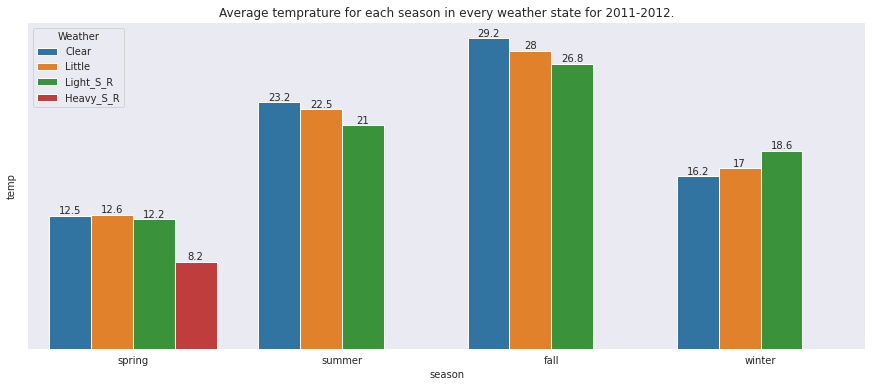

In [13]:
title = 'Average temprature for each season in every weather state for 2011-2012.'
plt.figure(figsize=(15,6))
barplotGroups(data=seasonWeather,x='season',y='temp',hue='weather',title=title,legendtitle='Weather');

Average different of measured temprature with "feels like" temperature.

In [14]:
diferentTmp = trdf['atemp'] - trdf['temp']
print(f'Average different of temp and atemp for all rows: {diferentTmp.mean().round(1)} C.')
print('"feels like" temperature larger than the measured temperature!')


Average different of temp and atemp for all rows: 3.4 C.
"feels like" temperature larger than the measured temperature!


### About humidity and season.

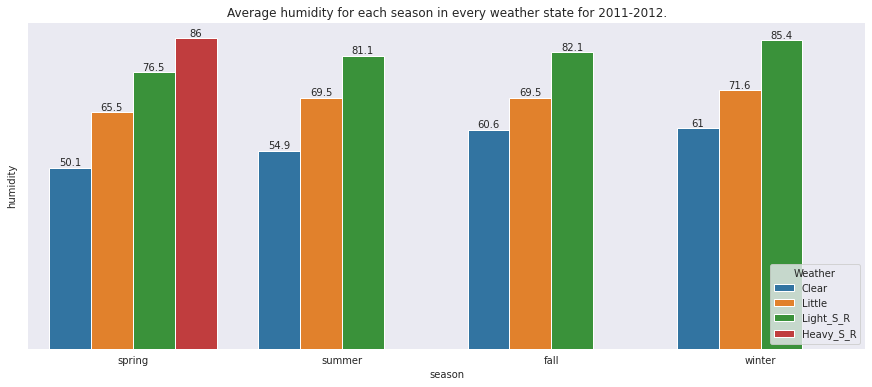

In [15]:
title = 'Average humidity for each season in every weather state for 2011-2012.'
plt.figure(figsize=(15,6))
ax=barplotGroups(data=seasonWeather,x='season',y='humidity',hue='weather',title=title,legendtitle='Weather')
ax.legend(title='Weather',loc='lower right');

### About windspeed and season.

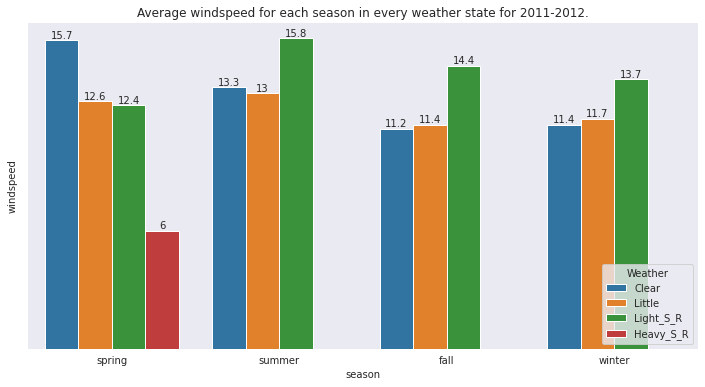

In [16]:
title = 'Average windspeed for each season in every weather state for 2011-2012.'
plt.figure(figsize=(12,6))
ax=barplotGroups(data=seasonWeather,x='season',y='windspeed',hue='weather',title=title,legendtitle='Weather')
ax.legend(title='Weather',loc='lower right');

# -----------------------------------------------------------------------------------------------------------------------------------

### Explore to every variables and their charactristics.

#### A little exploratory about time for every samples.

The training set has hourly rental data spanning two years.the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month.

In [17]:
datedf = pd.DataFrame(trdf['datetime'])
datedf['year'] = datedf['datetime'].dt.year
datedf['month'] = datedf['datetime'].dt.month
datedf['day'] = datedf['datetime'].dt.day
datedf['hour'] = datedf['datetime'].dt.hour

df = datedf.drop(columns='datetime').groupby(['year','month','day'],as_index=False).count()
print('Our train dataset have two year and 12 months with 19 days every month.')
print('I count days that have more than 20 hours record data for every month.')

# Build a new column based on more than 20 hours of record days.
# Column for days that have a record of more than 20 hours 1 and days less than 0..
df2 = df.assign(daysMore20H=np.where(df['hour']>=20,1,0))

# Grouping base on year and month and counting days.
#df2.groupby(['year','month']).agg({'day':['count'],'daysMore20H':['sum']})
df2.groupby(['year','month']).agg(CountDays=('day','count'),DaysMore20H=('daysMore20H','sum'))

Our train dataset have two year and 12 months with 19 days every month.
I count days that have more than 20 hours record data for every month.


CountDays  DaysMore20H
year month                        
2011 1             19           18
     2             19           19
     3             19           19
     4             19           19
     5             19           19
     6             19           19
     7             19           19
     8             19           19
     9             19           19
     10            19           19
     11            19           19
     12            19           19
2012 1             19           19
     2             19           19
     3             19           19
     4             19           19
     5             19           19
     6             19           19
     7             19           19
     8             19           19
     9             19           19
     10            19           19
     11            19           19
     12            19           19

#### we just have one day that have less than 20 hour record.

In [18]:
df[df['hour']<20]

,year,month,day,hour
17,2011,1,18,12


#### season

In [19]:
season = trdf['season'].value_counts(dropna=False)
print('Season variable as categorical data is a nominal variable.')
print('1 -> spring. 2 -> summer. 3 -> fall. 4 -> winter.')
print(f'Count of all rows is {season.sum()}.')
print('----------------------------------------------------')
print('Seasons:')
season

Season variable as categorical data is a nominal variable.
1 -> spring. 2 -> summer. 3 -> fall. 4 -> winter.
Count of all rows is 10886.
----------------------------------------------------
Seasons:


4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

#### holiday

In [20]:
holiday = trdf['holiday'].value_counts(dropna=False)
print('Holiday variable as categorical data is a nominal variable.')
print('1 -> holiday and 0 -> non holiday')
print(f'Count of all rows is {holiday.sum()}.')
print('----------------------------------------------------')
print('Holiday:')
holiday

Holiday variable as categorical data is a nominal variable.
1 -> holiday and 0 -> non holiday
Count of all rows is 10886.
----------------------------------------------------
Holiday:


0    10575
1      311
Name: holiday, dtype: int64

#### workingday

Workingday - whether the day is neither a weekend nor holiday

In [21]:
workingday = trdf['workingday'].value_counts(dropna=False)
print('Workingday variable as categorical data is a nominal variable.')
print('1 -> workingday and 0 -> non workingday')
print(f'Count of all rows is {workingday.sum()}.')
print('----------------------------------------------------')
print('Workingday:')
workingday

Workingday variable as categorical data is a nominal variable.
1 -> workingday and 0 -> non workingday
Count of all rows is 10886.
----------------------------------------------------
Workingday:


1    7412
0    3474
Name: workingday, dtype: int64

### weather

In [22]:
weather = trdf['weather'].value_counts(dropna=False)
print('Weather variable as categorical data is a nominal variable.')
weatherExplain = '''
Weather:
1: Clear, Few clouds, Partly cloudy, Partly cloudy.
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
'''
print(weatherExplain)
print(f'Count of all rows is {workingday.sum()}.')
print('----------------------------------------------------')
print('Weather:')
print(weather)
print('-----------------------------------------------------------')
print('Weather in every season for every year.')
df = trdf[['datetime','season','weather']].assign(year=trdf['datetime'].dt.year)
# grouping base year season and weather and cout rows relatd for each weather.
df.groupby(['year','season','weather']).agg(CountData=('datetime','count'))

Weather variable as categorical data is a nominal variable.

Weather:
1: Clear, Few clouds, Partly cloudy, Partly cloudy.
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

Count of all rows is 10886.
----------------------------------------------------
Weather:
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
-----------------------------------------------------------
Weather in every season for every year.


CountData
year season weather           
2011 1      1              855
            2              369
            3               99
     2      1              845
            2              394
            3              128
     3      1              959
            2              291
            3              115
     4      1              924
            2              312
            3              131
2012 1      1              904
            2              346
            3              112
            4                1
     2      1              956
            2              314
            3               96
     3      1              971
            2              313
            3               84
     4      1              778
            2              495
            3               94

In [23]:
print('4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.')
trdf[trdf['weather']==4]

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total number
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


### temp
Temperature in Celsius

In [24]:
trdf['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [25]:
# function for some plot and explore countinuos variable.
def seasonHist(data,name,someExplain,var):
    print(f'Histogram of {name} for each season.')
    print(someExplain)
    fig,axes=plt.subplots(1,4,figsize=(20,4),sharex=True,sharey=True)
    ax1=sns.histplot(data[data['season']==1][var],kde=True,ax=axes[0],bins=12,stat='proportion')
    ax2=sns.histplot(data[data['season']==2][var],kde=True,ax=axes[1],bins=12,stat='proportion')
    ax3=sns.histplot(data[data['season']==3][var],kde=True,ax=axes[2],bins=12,stat='proportion')
    ax4=sns.histplot(data[data['season']==4][var],kde=True,ax=axes[3],bins=12,stat='proportion')
    ax1.set_title('Spring')
    ax2.set_title('Summer')
    ax3.set_title('Fall')
    ax4.set_title('Winter');

# A function for plot Average variable for every hour in each season.'
def seasonScatterHour(data,explain,var,legend=False,textAnnot = True):
    df = data.groupby(['season','hour'],as_index=False).agg(avg =(var,'mean'))
    plt.figure(figsize=(12,6))
    palette=sns.color_palette("tab10",4)
    ax=sns.scatterplot(data=df,x='hour',y='avg',hue='season',palette=palette,s=70,legend=legend )
    ax.set_title(explain)
    if textAnnot ==True:
        ax.text(-0.5, df[df['season']==1]['avg'].iloc[0]+1,'Spring', fontsize=12)
        ax.text(-0.5, df[df['season']==2]['avg'].iloc[0]+1,'Summer', fontsize=12)
        ax.text(-0.5, df[df['season']==3]['avg'].iloc[0]+1,'Fall', fontsize=12)
        ax.text(-0.5, df[df['season']==4]['avg'].iloc[0]+1,'Winter', fontsize=12)
        ax.set_xticks(range(0,24));
        maxtmp = df.groupby(['season'],as_index=False).agg(maxtmp=('avg','max'))
        hourmaxtmp = df[df['avg'].isin(maxtmp['maxtmp'])].round(1)

        for i,s in hourmaxtmp.iterrows():
            ax.annotate(s['avg'], xy=(s['hour'], s['avg']), xytext=(s['hour']-1, s['avg']-2),
                        arrowprops=dict(arrowstyle="->",color='black',connectionstyle="angle3,angleA=0,angleB=-90")) 
    return ax

temp variable as numeric data is a interval variable.
Count of all rows is 10886.
--------------------------------------------------------------
Histogram of temprature for each season.
It shows that Spring on average is colder than other seasons.


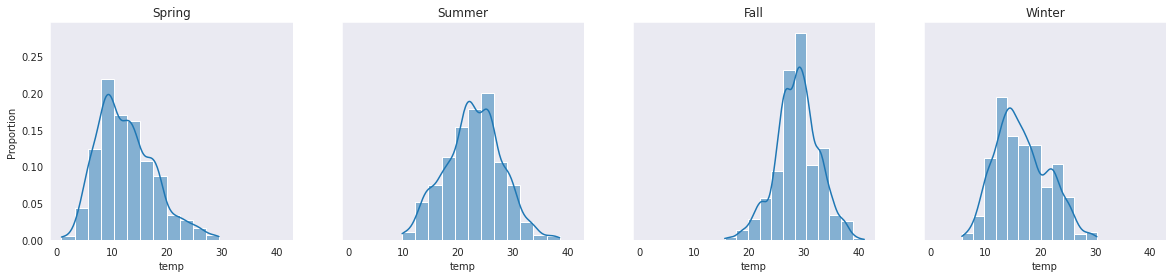

In [26]:
temp = trdf[['datetime','season','temp']]
print('temp variable as numeric data is a interval variable.')
print(f"Count of all rows is {temp['temp'].count()}.")
print('--------------------------------------------------------------')
#extract year and month.
temp = temp.assign(hour = temp.datetime.dt.hour, month = temp.datetime.dt.month ).drop(columns=['datetime'])
someExplain = 'It shows that Spring on average is colder than other seasons.'
seasonHist(temp,'temprature',someExplain,'temp')

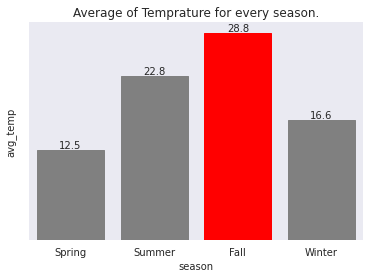

In [27]:
avgTempSeason = temp.groupby('season',as_index=False).agg(avg_temp=('temp','mean')).round(1)
avgTempSeason['season']=['Spring','Summer','Fall','Winter']
avgTempMonth = temp.groupby('month',as_index=False).agg(avg_temp=('temp','mean')).round(1)
plt.figure()
BarChart(data=avgTempSeason,x='season',y='avg_temp',title='Average of Temprature for every season.',colorCond=25)

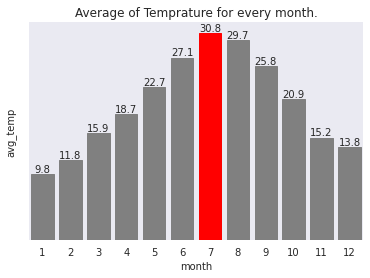

In [28]:
plt.figure()
BarChart(data=avgTempMonth,x='month',y='avg_temp',title='Average of Temprature for every month.',colorCond=30)

<AxesSubplot:title={'center':'Average temprature for every hour in each season.'}, xlabel='hour', ylabel='avg'>

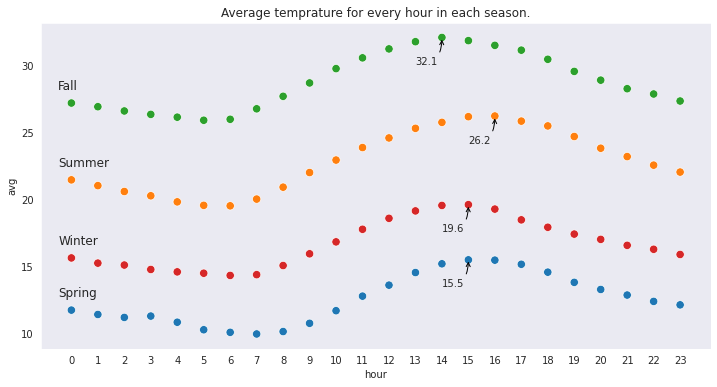

In [29]:
seasonScatterHour(temp,'Average temprature for every hour in each season.','temp')

### atemp
#### "feels like" temperature in Celsius.
I think this variable is like "temp" var but alittle difference.

In [30]:
trdf['atemp'].describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

atemp variable as numeric data is a interval variable.
Count of all rows is 10886.
--------------------------------------------------------------
Histogram of feel-like temprature for each season.
It shows that Spring on average is colder than other seasons.


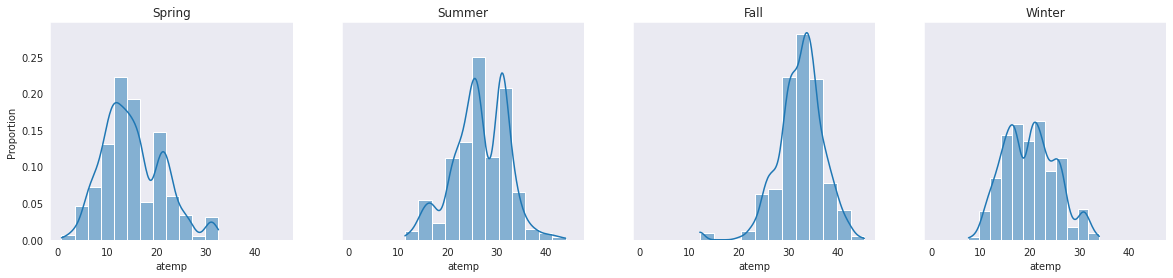

In [31]:
atemp = trdf[['datetime','season','atemp']]
print('atemp variable as numeric data is a interval variable.')
print(f"Count of all rows is {atemp['atemp'].count()}.")
print('--------------------------------------------------------------')
#extract year and month.
atemp = atemp.assign(hour = atemp.datetime.dt.hour, month = atemp.datetime.dt.month ).drop(columns=['datetime'])
someExplain = 'It shows that Spring on average is colder than other seasons.'
seasonHist(atemp,'feel-like temprature',someExplain,'atemp')

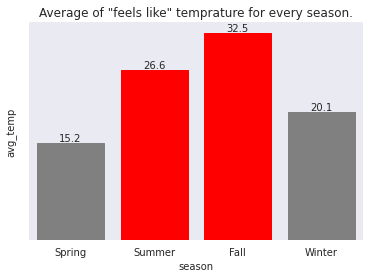

In [32]:
avgatempSeason = atemp.groupby('season',as_index=False).agg(avg_temp=('atemp','mean')).round(1)
avgatempSeason['season']=['Spring','Summer','Fall','Winter']
avgatempMonth = atemp.groupby('month',as_index=False).agg(avg_temp=('atemp','mean')).round(1)
plt.figure()
BarChart(data=avgatempSeason,x='season',y='avg_temp',title='Average of "feels like" temprature for every season.',colorCond=25)

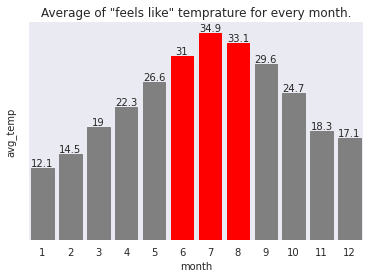

In [33]:
plt.figure()
BarChart(data=avgatempMonth,x='month',y='avg_temp',title='Average of "feels like" temprature for every month.',colorCond=30)

<AxesSubplot:title={'center':'Average feel-like temprature for every hour in each season.'}, xlabel='hour', ylabel='avg'>

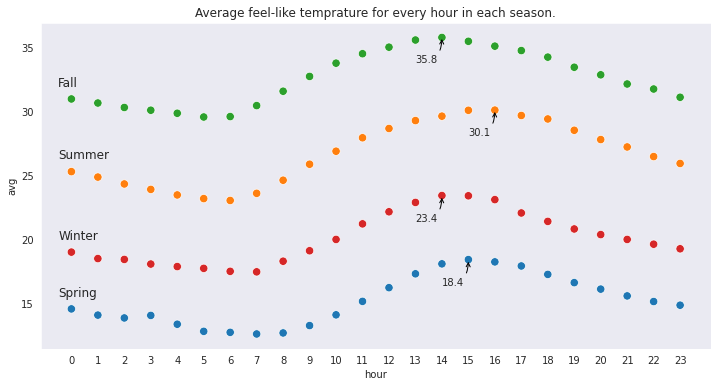

In [34]:
seasonScatterHour(atemp,'Average feel-like temprature for every hour in each season.','atemp')

### humidity - relative humidity

The term relative humidity (RH) expresses the relationship between the moisture content of air at a certain temperature and the moisture content of moisture-saturated air at the same temperature.\
It is given as a percentage from 0 to 100.\
0% RH means absolutely dry air, zero moisture content.\
<br>
[link1](https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/relative-humidity#:~:text=The%20term%20relative%20humidity%20(RH,percentage%20from%200%20to%20100.)
<br>
[link2](https://www.lenntech.com/calculators/humidity/relative-humidity.htm)
<br>
[link3](https://en.wikipedia.org/wiki/Humidity#Relative_humidity)


In [35]:
trdf['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

humidity variable as numeric data is a ratio variable.
Count of all rows is 10886.
--------------------------------------------------------------
Histogram of relative humidity for each season.
It shows that humidity increase relatively from spring to winter.


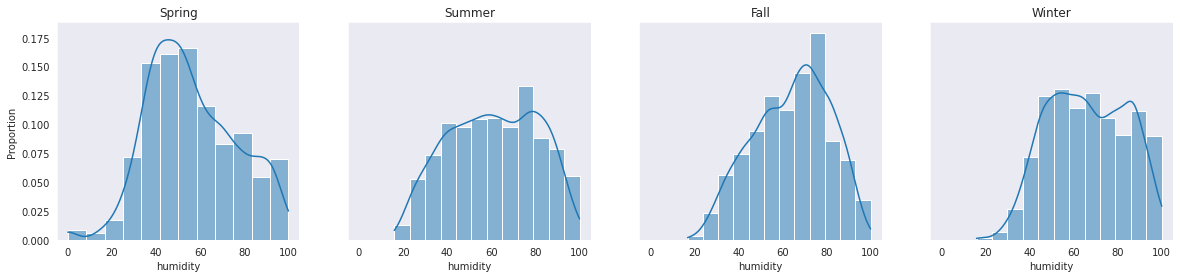

In [36]:
humidity = trdf[['datetime','season','humidity']]
print('humidity variable as numeric data is a ratio variable.')
print(f"Count of all rows is {humidity['humidity'].count()}.")
print('--------------------------------------------------------------')
#extract year and month.
humidity = humidity.assign(hour = humidity.datetime.dt.hour, month = humidity.datetime.dt.month ).drop(columns=['datetime'])
someExplain = 'It shows that humidity increase relatively from spring to winter.'
seasonHist(humidity,'relative humidity',someExplain,'humidity')

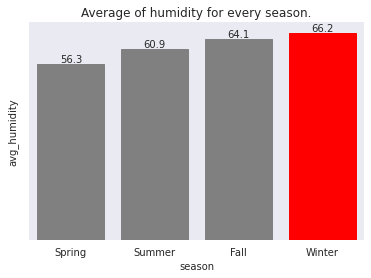

In [37]:
avghumiditySeason = humidity.groupby('season',as_index=False).agg(avg_humidity=('humidity','mean')).round(1)
avghumiditySeason['season']=['Spring','Summer','Fall','Winter']
avghumidityMonth = humidity.groupby('month',as_index=False).agg(avg_humidity=('humidity','mean')).round(1)
plt.figure()
BarChart(data=avghumiditySeason,x='season',y='avg_humidity',title='Average of humidity for every season.',colorCond=65)

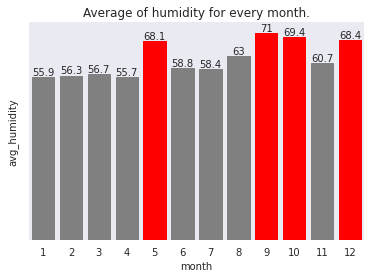

In [38]:
plt.figure()
BarChart(data=avghumidityMonth,x='month',y='avg_humidity',title='Average of humidity for every month.',colorCond=68)

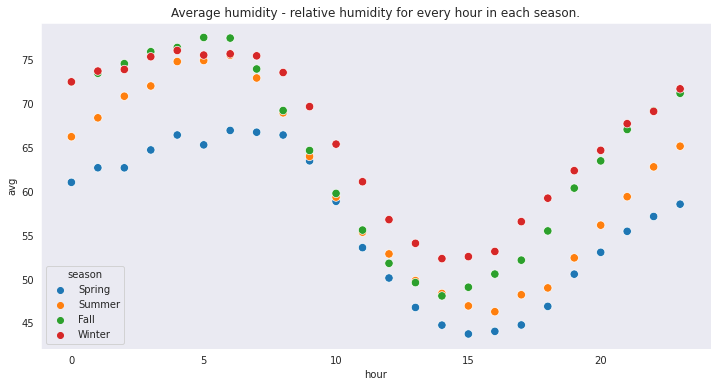

In [39]:
ax=seasonScatterHour(humidity,'Average humidity - relative humidity for every hour in each season.','humidity',legend=True,textAnnot=False)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels,['Spring','Summer','Fall','Winter'],title='season');

### windspeed - wind speed

In [40]:
trdf['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

windspeed variable as numeric data is a ratio variable.
Count of all rows is 10886.
--------------------------------------------------------------
Histogram of windspeed for each season.



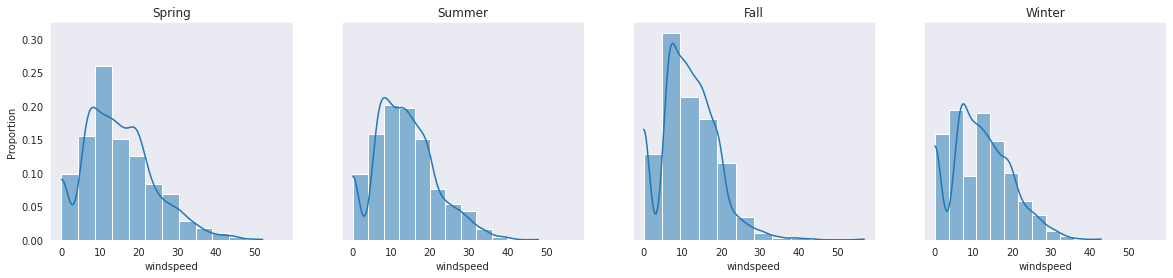

In [41]:
windspeed = trdf[['datetime','season','windspeed']]
print('windspeed variable as numeric data is a ratio variable.')
print(f"Count of all rows is {windspeed['windspeed'].count()}.")
print('--------------------------------------------------------------')
#extract year and month.
windspeed = windspeed.assign(hour = windspeed.datetime.dt.hour, month = windspeed.datetime.dt.month ).drop(columns=['datetime'])
someExplain = ''
seasonHist(windspeed,'windspeed',someExplain,'windspeed')

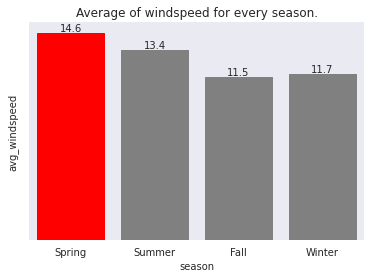

In [42]:
avgWindspeedSeason = windspeed.groupby('season',as_index=False).agg(avg_windspeed=('windspeed','mean')).round(1)
avgWindspeedSeason['season']=['Spring','Summer','Fall','Winter']
avgWindspeedMonth = windspeed.groupby('month',as_index=False).agg(avg_windspeed=('windspeed','mean')).round(1)
plt.figure()
BarChart(data=avgWindspeedSeason,x='season',y='avg_windspeed',title='Average of windspeed for every season.',colorCond=14)

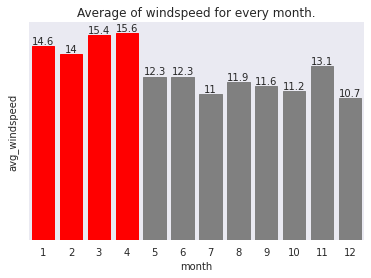

In [43]:
plt.figure()
BarChart(data=avgWindspeedMonth,x='month',y='avg_windspeed',title='Average of windspeed for every month.',colorCond=13.99)

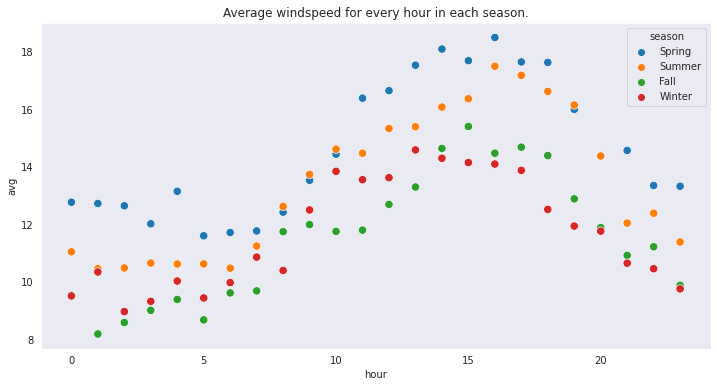

In [44]:
ax=seasonScatterHour(windspeed,'Average windspeed for every hour in each season.','windspeed',legend=True,textAnnot=False)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels,['Spring','Summer','Fall','Winter'],title='season');

### Exploring Number of rent related to holiday and workingday. 

In [45]:
dayModeRents = trdf[['season','holiday','workingday','casual','registered','total number']]


In [46]:
# there isn't any record that both of holiday and workingday become true.
dayModeRents[(dayModeRents['holiday']==1)&(dayModeRents['workingday']==1)]

,season,holiday,workingday,casual,registered,total number


#### Number of rental in different season and holiday mode.

In [47]:
holidayModes=dayModeRents.groupby(['season','holiday']).agg(CasualMean=('casual','mean'),CasualStd=('casual','std'),
                                                            RegisteredMean=('registered','mean'),RegisteredStd=('registered','std'),
                                                            TotalMean=('total number','mean'),TotalStd=('total number','std'))
holidayModes.index = holidayModes.index.set_levels([['Spring','Summer','Fall','Winter'],['Not holiday','Holiday']])
holidayModes.reset_index(inplace=True)
holidayModes=holidayModes.round(0)
holidayModes

,season,holiday,CasualMean,CasualStd,RegisteredMean,RegisteredStd,TotalMean,TotalStd
0,Spring,Not holiday,16.0,32.0,102.0,109.0,117.0,126.0
1,Spring,Holiday,8.0,9.0,66.0,58.0,74.0,65.0
2,Summer,Not holiday,48.0,58.0,168.0,156.0,216.0,192.0
3,Summer,Holiday,38.0,33.0,160.0,151.0,198.0,173.0
4,Fall,Not holiday,51.0,53.0,184.0,166.0,234.0,198.0
5,Fall,Holiday,92.0,81.0,146.0,114.0,238.0,187.0
6,Winter,Not holiday,28.0,42.0,170.0,156.0,199.0,178.0
7,Winter,Holiday,41.0,45.0,170.0,131.0,211.0,163.0


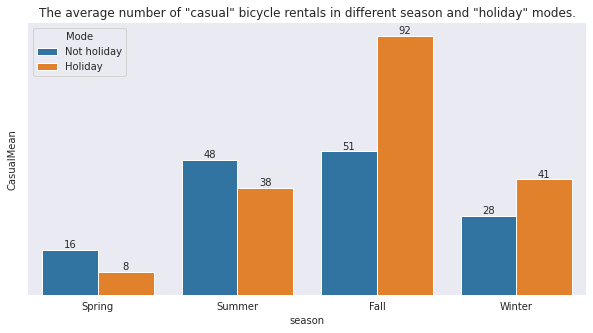

In [48]:
title = 'The average number of "casual" bicycle rentals in different season and "holiday" modes.'
plt.figure(figsize=(10,5))
barplotGroups(data=holidayModes,x='season',y='CasualMean',hue='holiday',title=title,legendtitle='Mode');

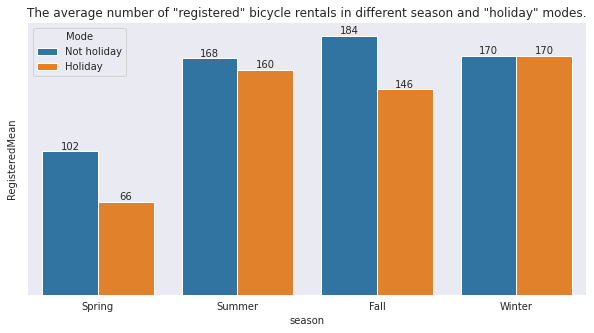

In [49]:
title = 'The average number of "registered" bicycle rentals in different season and "holiday" modes.'
plt.figure(figsize=(10,5))
barplotGroups(data=holidayModes,x='season',y='RegisteredMean',hue='holiday',title=title,legendtitle='Mode');

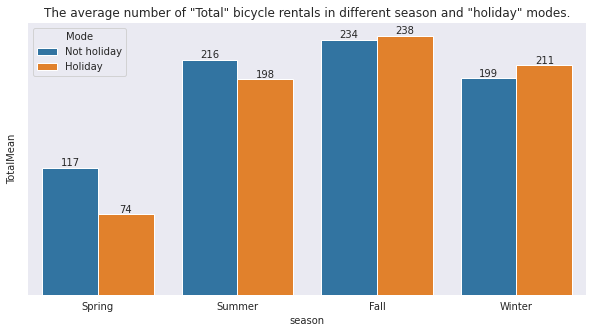

In [50]:
title = 'The average number of "Total" bicycle rentals in different season and "holiday" modes.'
plt.figure(figsize=(10,5))
barplotGroups(data=holidayModes,x='season',y='TotalMean',hue='holiday',title=title,legendtitle='Mode');

In [51]:
# costomized boxplot function
def boxplot(data,x,y,hue=None,title='',legendList=None,legendLoc=None,xticklabelsList=None):
    ax= sns.boxplot(data=data,x=x,y=y,hue=hue)
    #remove additional components from the figure.
    sns.despine(top = True, left = True)
    ax.set(title=title)
    
    if legendList!=None and legendLoc!=None:
        handles, _ = ax.get_legend_handles_labels()         
        ax.legend(handles, legendList, loc=legendLoc )
    if xticklabelsList!=None:
        ax.set_xticklabels(xticklabelsList)
        
    return ax

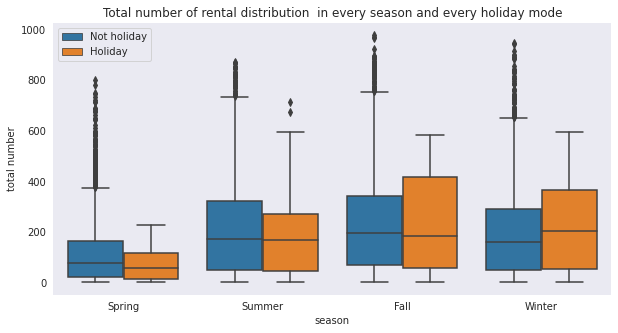

In [52]:
plt.figure(figsize=(10,5))
title='Total number of rental distribution  in every season and every holiday mode'
ax = boxplot(data=dayModeRents,x='season',y='total number',hue='holiday',
             title=title,legendList=["Not holiday", "Holiday"],legendLoc='best',
             xticklabelsList=['Spring','Summer','Fall','Winter'])

#### Number of rental in different season and workingday mode.

In [53]:
workingdayModes=dayModeRents.groupby(['season','workingday']).agg(CasualMean=('casual','mean'),CasualStd=('casual','std'),
                                                            RegisteredMean=('registered','mean'),RegisteredStd=('registered','std'),
                                                            TotalMean=('total number','mean'),TotalStd=('total number','std'))
workingdayModes.index = workingdayModes.index.set_levels([['spring','summer','fall','winter'],['not workingday','workingday']])
workingdayModes.reset_index(inplace=True)
workingdayModes=workingdayModes.round(0)
workingdayModes

,season,workingday,CasualMean,CasualStd,RegisteredMean,RegisteredStd,TotalMean,TotalStd
0,spring,not workingday,27.0,49.0,79.0,79.0,106.0,121.0
1,spring,workingday,10.0,16.0,111.0,118.0,121.0,127.0
2,summer,not workingday,80.0,84.0,143.0,115.0,223.0,192.0
3,summer,workingday,33.0,32.0,179.0,170.0,212.0,192.0
4,fall,not workingday,82.0,75.0,150.0,110.0,233.0,179.0
5,fall,workingday,38.0,32.0,198.0,183.0,235.0,205.0
6,winter,not workingday,49.0,63.0,144.0,111.0,192.0,165.0
7,winter,workingday,19.0,22.0,183.0,170.0,202.0,183.0


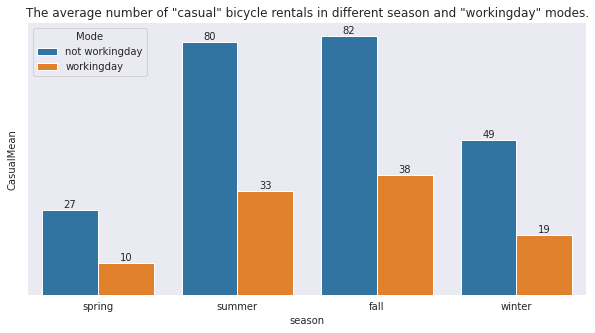

In [54]:
title = 'The average number of "casual" bicycle rentals in different season and "workingday" modes.'
plt.figure(figsize=(10,5))
barplotGroups(data=workingdayModes,x='season',y='CasualMean',hue='workingday',title=title,legendtitle='Mode');

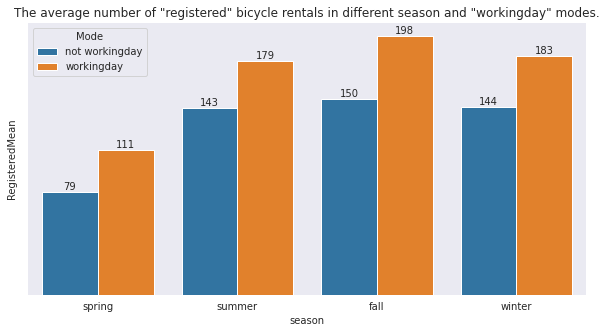

In [55]:
title = 'The average number of "registered" bicycle rentals in different season and "workingday" modes.'
plt.figure(figsize=(10,5))
barplotGroups(data=workingdayModes,x='season',y='RegisteredMean',hue='workingday',title=title,legendtitle='Mode');

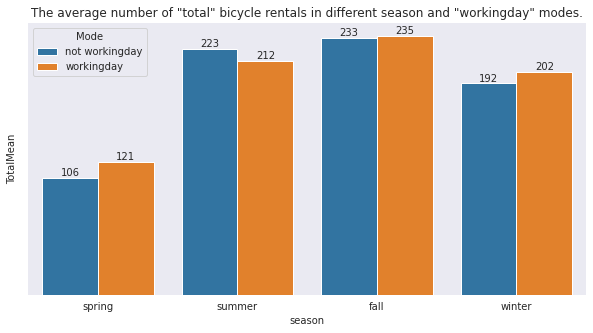

In [56]:
title = 'The average number of "total" bicycle rentals in different season and "workingday" modes.'
plt.figure(figsize=(10,5))
barplotGroups(data=workingdayModes,x='season',y='TotalMean',hue='workingday',title=title,legendtitle='Mode');

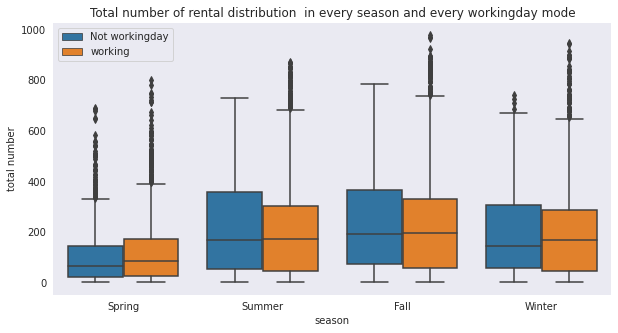

In [57]:
plt.figure(figsize=(10,5))
title='Total number of rental distribution  in every season and every workingday mode'
ax = boxplot(data=dayModeRents,x='season',y='total number',hue='workingday',
             title=title,legendList=["Not workingday", "working"],legendLoc='best',
             xticklabelsList=['Spring','Summer','Fall','Winter'])

#### Number of rental in different weather.

In [58]:
print('We have just one row record for Heavy_S_R weather then we don\'t consider it.')
trdf[trdf['weather']==4]

We have just one row record for Heavy_S_R weather then we don't consider it.


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total number
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


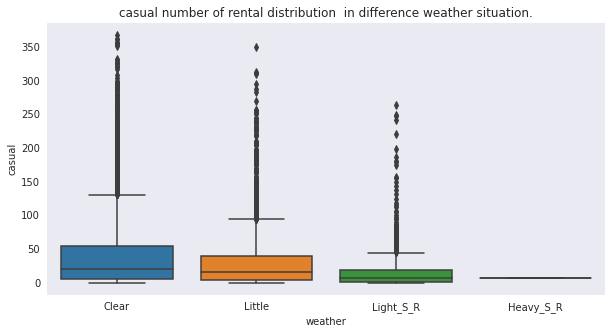

In [59]:
weatherRental = trdf[['weather','casual','registered','total number']]
plt.figure(figsize=(10,5))
title='casual number of rental distribution  in difference weather situation.'
ax = boxplot(data=weatherRental,x='weather',y='casual',
             title=title,xticklabelsList=['Clear','Little','Light_S_R','Heavy_S_R'])

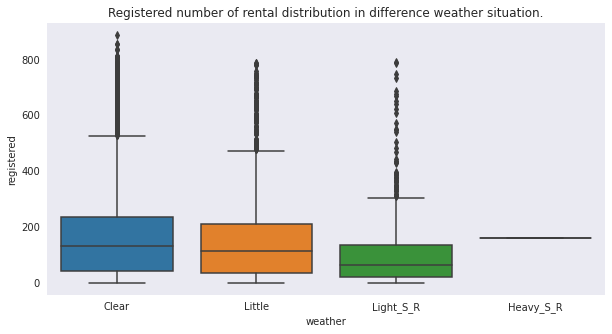

In [60]:
weatherRental = trdf[['weather','casual','registered','total number']]
plt.figure(figsize=(10,5))
title='Registered number of rental distribution in difference weather situation.'
ax = boxplot(data=weatherRental,x='weather',y='registered',
             title=title,xticklabelsList=['Clear','Little','Light_S_R','Heavy_S_R'])

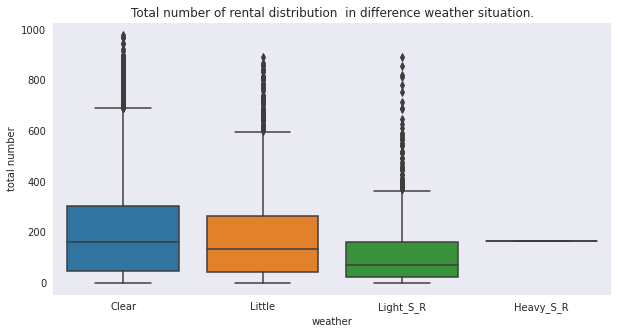

In [61]:
weatherRental = trdf[['weather','casual','registered','total number']]
plt.figure(figsize=(10,5))
title='Total number of rental distribution  in difference weather situation.'
ax = boxplot(data=weatherRental,x='weather',y='total number',
             title=title,xticklabelsList=['Clear','Little','Light_S_R','Heavy_S_R'])

In [62]:
weatherModes=weatherRental.groupby('weather').agg(CasualMean=('casual','mean'),CasualStd=('casual','std'),CasualSum=('casual','sum'),
                                                            RegisteredMean=('registered','mean'),RegisteredStd=('registered','std'),RegisteredSum=('registered','sum'),
                                                            TotalMean=('total number','mean'),TotalStd=('total number','std'),TotalSum=('total number','sum'),)
weatherModes=weatherModes.rename(index={1:'Clear',2:'Little',3:'Light_S_R',4:'Heavy_S_R'} )
weatherModes.reset_index(inplace=True)
weatherModes=weatherModes.round(0)
weatherModes


,weather,CasualMean,CasualStd,CasualSum,RegisteredMean,RegisteredStd,RegisteredSum,TotalMean,TotalStd,TotalSum
0,Clear,40.0,53.0,289900,165.0,155.0,1186163,205.0,188.0,1476063
1,Little,31.0,43.0,87246,148.0,145.0,419914,179.0,168.0,507160
2,Light_S_R,17.0,32.0,14983,101.0,119.0,87106,119.0,139.0,102089
3,Heavy_S_R,6.0,NaN,6,158.0,NaN,158,164.0,NaN,164


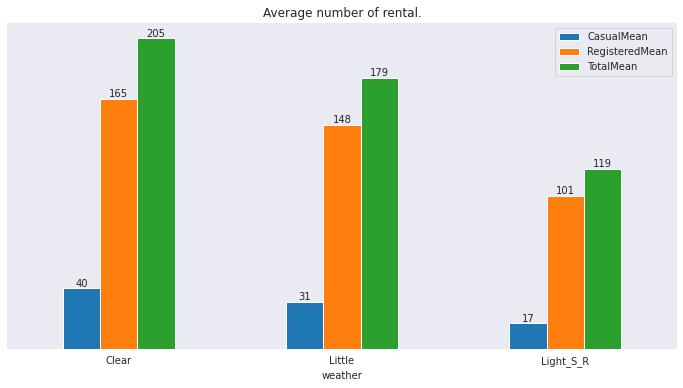

In [63]:
#plt.figure(figsize=(15,6))
ax = weatherModes.iloc[:3,:].plot(x='weather',y=['CasualMean','RegisteredMean','TotalMean'],
                  kind='bar',figsize=(12,6),rot=0,title='Average number of rental.');
#print values for each bars.
for i in ax.containers:
    ax.bar_label(i,)
#remove additional components from the figure.
sns.despine(top = True, left = True)
ax.set(yticklabels=[])
ax.tick_params(left=False)

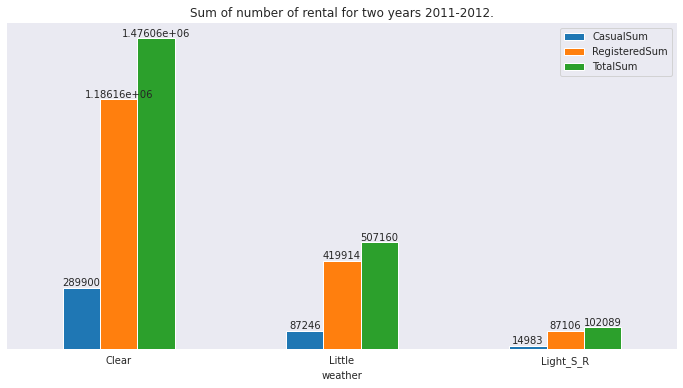

In [64]:
ax = weatherModes.iloc[:3,:].plot(x='weather',y=['CasualSum','RegisteredSum','TotalSum'],
                  kind='bar',figsize=(12,6),rot=0,title='Sum of number of rental for two years 2011-2012.');
#print values for each bars.
for i in ax.containers:
    ax.bar_label(i,)
#remove additional components from the figure.
sns.despine(top = True, left = True)
ax.set(yticklabels=[])
ax.tick_params(left=False)

### Exploring number of rental  respected to temp

In [65]:
tempRental = trdf[['datetime','season','temp','atemp','casual','registered','total number']]

In [66]:
tempRental = tempRental.assign(week =  tempRental['datetime'].dt.isocalendar().week )

averagePerWeek = tempRental.groupby(['season','week'],as_index=False).agg(avg_W_temp=('temp','mean'),std_W_temp=('temp','std'),
                                                              avg_W_atemp=('atemp','mean'),std_W_atemp=('atemp','std'),
                                                              avg_W_casual=('casual','mean'),std_W_casual=('casual','std'),
                                                              avg_W_registered=('registered','mean'),std_W_registered=('registered','std'),
                                                              avg_W_total=('total number','mean'),std_W_total=('total number','std'))
averagePerWeek=averagePerWeek.round(0)
averagePerWeek.head()

,season,week,avg_W_temp,std_W_temp,avg_W_atemp,std_W_atemp,avg_W_casual,std_W_casual,avg_W_registered,std_W_registered,avg_W_total,std_W_total
0,1,1,9.0,4.0,11.0,5.0,10.0,21.0,85.0,87.0,95.0,100.0
1,1,2,9.0,3.0,11.0,4.0,6.0,9.0,82.0,88.0,89.0,93.0
2,1,3,10.0,4.0,12.0,4.0,5.0,6.0,94.0,97.0,99.0,100.0
3,1,5,12.0,4.0,14.0,5.0,9.0,12.0,95.0,100.0,104.0,107.0
4,1,6,10.0,4.0,12.0,5.0,7.0,9.0,95.0,99.0,102.0,103.0


I will use spearman approach to understand correlation between two variable. All variables\
avg_W_temp,avg_W_casual,avg_W_registered,avg_W_total don't look like normal.

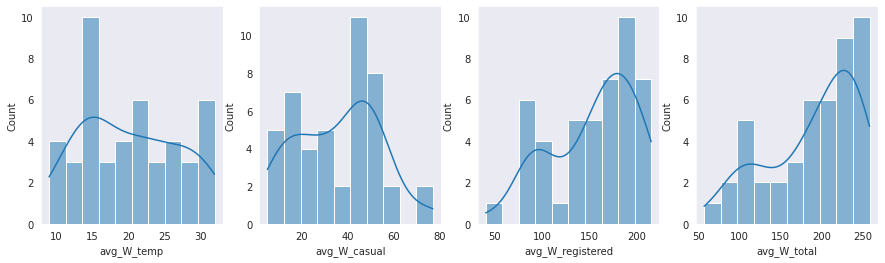

In [67]:

fig, axes = plt.subplots(1, 4,figsize=(15,4))
sns.histplot(averagePerWeek['avg_W_temp'],ax=axes[0],bins=10,kde=True)
ax2=plt.subplot(1,4,2)
sns.histplot(averagePerWeek['avg_W_casual'],ax=axes[1],bins=10,kde=True)
ax3=plt.subplot(1,4,3)
sns.histplot(averagePerWeek['avg_W_registered'],ax=axes[2],bins=10,kde=True)
ax4=plt.subplot(1,4,4)
sns.histplot(averagePerWeek['avg_W_total'],ax=axes[3],bins=10,kde=True);

correlation: 0.994


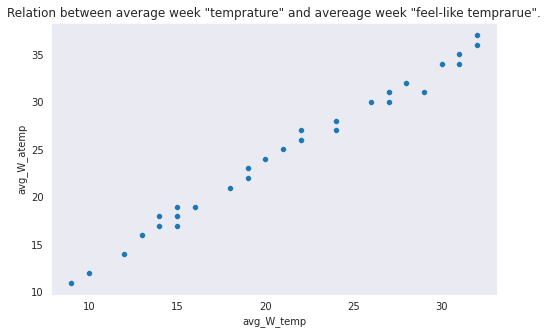

In [68]:
plt.figure(figsize=(8,5))
print('correlation:',averagePerWeek['avg_W_temp'].corr(averagePerWeek['avg_W_atemp'],method='spearman').round(3))
ax=sns.scatterplot(data=averagePerWeek,x='avg_W_temp',y='avg_W_atemp')
ax.set(title='Relation between average week "temprature" and avereage week "feel-like temprarue".');

correlation: 0.84


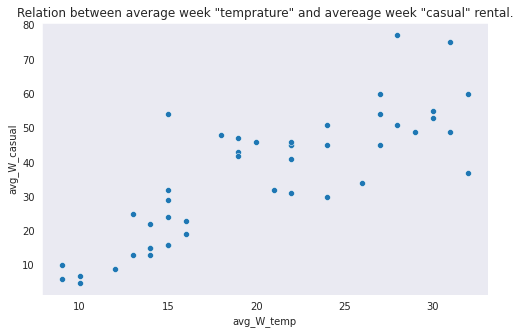

In [69]:
plt.figure(figsize=(8,5))
print('correlation:',averagePerWeek['avg_W_temp'].corr(averagePerWeek['avg_W_casual'],method='spearman').round(2))
ax=sns.scatterplot(data=averagePerWeek,x='avg_W_temp',y='avg_W_casual')
ax.set(title='Relation between average week "temprature" and avereage week "casual" rental.');

correlation: 0.62


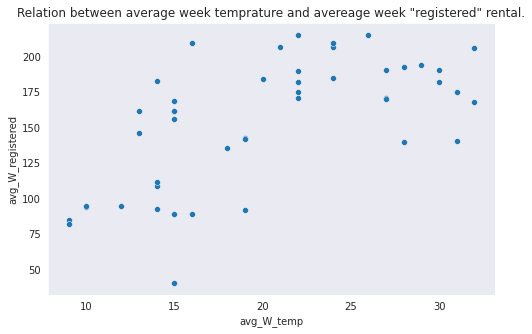

In [70]:
plt.figure(figsize=(8,5))
print('correlation:',averagePerWeek['avg_W_temp'].corr(averagePerWeek['avg_W_registered'],method='spearman').round(2))
ax=sns.scatterplot(data=averagePerWeek,x='avg_W_temp',y='avg_W_registered')
ax.set(title='Relation between average week temprature and avereage week "registered" rental.');

correlation: 0.81


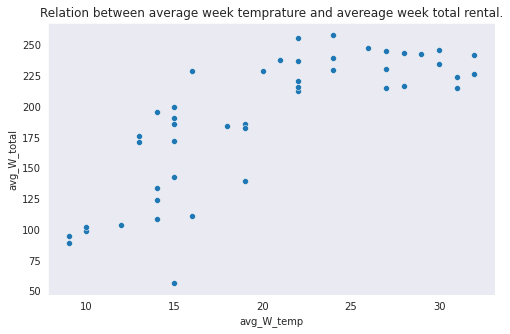

In [71]:
plt.figure(figsize=(8,5))
print('correlation:',averagePerWeek['avg_W_temp'].corr(averagePerWeek['avg_W_total'],method='spearman').round(2))
ax=sns.scatterplot(data=averagePerWeek,x='avg_W_temp',y='avg_W_total')
ax.set(title='Relation between average week temprature and avereage week total rental.');

According to the correlation between temperature and rent in different modes,\
we can think that temperature may be more influential in the tendency to choose\
bicycle rental tendencies in casual mode.

### we can have correlation test between two variables "temp" and "total number".
the number of data is suitable big and i decide to have a test with  alph(confidence level)=0.05.

In [72]:
from scipy.stats import spearmanr
sp= spearmanr(trdf['temp'],trdf['total number'])
print(f'Correlation test for temp and total number variables:\ncorrelation:{round(sp[0],3)} and p_value:{sp[1]}')

Correlation test for temp and total number variables:
correlation:0.408 and p_value:0.0


In [73]:
sp= spearmanr(trdf['temp'],trdf['casual'])
print(f'Correlation test for temp and casual variables:\ncorrelation:{round(sp[0],3)} and p_value:{sp[1]}')

Correlation test for temp and casual variables:
correlation:0.573 and p_value:0.0


In [74]:
sp= spearmanr(trdf['temp'],trdf['registered'])
print(f'Correlation test for temp and registered variables:\ncorrelation:{round(sp[0],3)} and p_value:{sp[1]}')

Correlation test for temp and registered variables:
correlation:0.352 and p_value:0.0


Above test show us we have significant confidence the variables(number of rental) can have some relation with temp.

Because the analysis was long and this analysis also has an educational aspect, I skip the analysis of the other two variables.

### Heatmap of All continuous variables

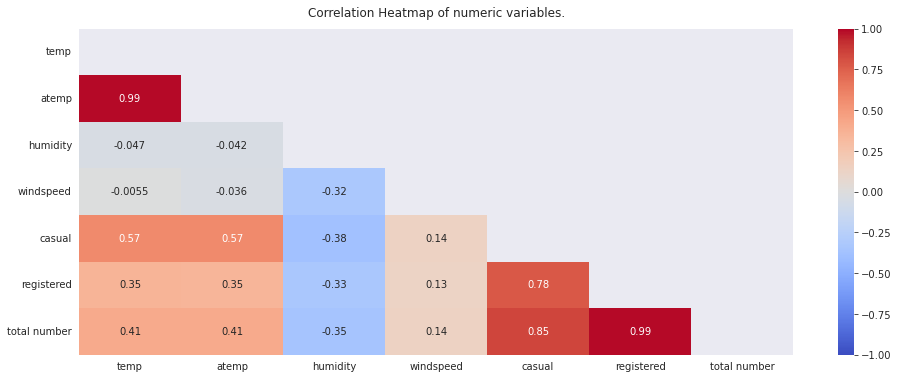

In [137]:
corr = trdf[['temp','atemp','humidity','windspeed','casual','registered','total number']].corr(method='spearman')
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1,mask=mask ,annot=True,cmap='coolwarm')

heatmap.set_title('Correlation Heatmap of numeric variables.', fontdict={'fontsize':12}, pad=12);

### lets go to make prediction model.